In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline
import math
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, test_y) = cifar10.load_data()

num_classes = 10
y_train_cls = np_utils.to_categorical(y_train,num_classes)
test_y_cls = np_utils.to_categorical(test_y,num_classes)

print("Size of:")
print("- Training-set:\t\t{}".format(len(x_train)))
print("- Test-set:\t\t{}".format(len(test_x)))

Size of:
- Training-set:		50000
- Test-set:		10000


In [4]:
print (train_x.shape)
print (train_y_cls.shape)

def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_names = load_label_names()

def label_to_array(cls_true):
    true = cls_true.tolist()
    true_label = []
    for l in true:
        true_label += l
    return true_label
    

(50000, 32, 32, 3)
(50000, 10)


In [5]:
#Data Dimensions

# CIFAR-10 images are 32 pixels in each dimension.
img_size = 32

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images:
num_channels = 3

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [6]:
#Plotting Images

def plot_images(images, cls_true, cls_pred=None, smooth=True):

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

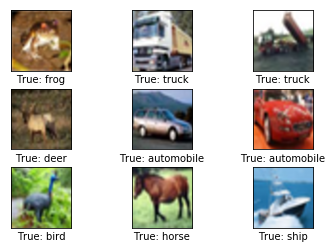

In [7]:
# Get the first 9 images from the test-set.
images = x_train[0:9]

# Get the true classes for those images.
cls_true = y_train[0:9]
cls_true = label_to_array(cls_true)

# Plot the images and labels using our helper-function above.
plot_images(images, cls_true)


### Prepare Data

In [ ]:
# Split data into train and validation sets
from sklearn.model_selection import train_test_split


train_x, validation_x, train_y, validation_y = train_test_split(x_train, y_train_cls,
                                                                test_size=0.2, random_state=42)

In [9]:
#Preparing Data
def data_prep(train, validation, test, subtract_pixel_mean):
    # Normalize Data
    train = train.astype('float32')/255
    validation = validation.astype('float32')/255
    test = test.astype('float32')/255
    
    # If subtract pixel mean is enabled
    if subtract_pixel_mean:
        train_mean = np.mean(train, axis=0)
        train -= train_mean
        validation -= train_mean
        test -= train_mean
        
    return train, validation, test


In [ ]:
# Subtract per pixel
subtract_pixel_mean = True

train_x, validation_x, test_x = data_prep(train_x, validation_x, test_x, subtract_pixel_mean)

In [8]:
#Import TensorFlow Libraries

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [11]:
#Building The Model
# Start construction of the Keras Sequential model.
model = Sequential()

#1st Layer
model.add(Conv2D(32, kernel_size = 3,padding = 'Same',
                activation = 'relu',
                input_shape = (img_size,img_size,num_channels)))
model.add(BatchNormalization())

#2nd Layer
model.add(Conv2D(32, kernel_size = 3, padding = 'Same',      
                activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),
                    strides = 2))
model.add(Dropout(0.2))

#3rd Layer
model.add(Conv2D(64, kernel_size = 3, padding = 'Same',
                activation = 'relu'))
model.add(BatchNormalization())

#4th Layer
model.add(Conv2D(64, kernel_size = 3, padding = 'Same',
                activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),
                    strides = 2))
model.add(Dropout(0.3))

#5th Layer
model.add(Conv2D(128, kernel_size = 3, padding = 'Same',
                activation = 'relu'))
model.add(BatchNormalization())

#6th Layer
model.add(Conv2D(128, kernel_size = 3, padding = 'Same',
                activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),
                    strides = 2))
model.add(Dropout(0.4))

#Flatten
model.add(Flatten())

#Output Layer
model.add(Dense(num_classes, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
40000/40000 [==============================] - 297s 7ms/sample - loss: 1.9187 - acc: 0.4119 - val_loss: 1.5881 - val_acc: 0.5041
Epoch 2/10
40000/40000 [==============================] - 298s 7ms/sample - loss: 1.2216 - acc: 0.5839 - val_loss: 0.9905 - val_acc: 0.6587
Epoch 3/10
40000/40000 [==============================] - 299s 7ms/sample - loss: 0.9595 - acc: 0.6682 - val_loss: 0.8625 - val_acc: 0.7131
Epoch 4/10
40000/40000 [==============================] - 299s 7ms/sample - loss: 0.8204 - acc: 0.7146 - val_loss: 0.7536 - val_acc: 0.7389
Epoch 5/10
40000/40000 [==============================] - 300s 7ms/sample - loss: 0.7262 - acc: 0.7492 - val_loss: 0.6540 - val_acc: 0.7753
Epoch 6/10
4000

In [ ]:
num_epochs = 200

# Initialize the optimizer and compile the model
optimizer = Adam(lr=0.0, momentum=0.9, decay=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer,
             metrics=['accuracy'])


## Step Decay
By using step decay, we schedule drop the learning rate by a factor every few epochs.

#### Is useful when training for long epochs

In [ ]:
# Define step decay function
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.1
    epochs_drop = 80.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Use data augmentation
augment_data = True

In [ ]:

# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    h = model.fit(train_x, train_y,
                  batch_size = 64,
                  validation_data=(validation_x, validation_y_cls),
                  callbacks=callbacks_list, 
                  epochs = num_epochs,
                  verbose = 1)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=True,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(train_x)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(train_x, train_y,
                                     batch_size=128),
                                     validation_data=(validation_x, validation_y),
                                     epochs=num_epochs, verbose=1, workers=4,
                                     callbacks=callbacks_list)
    

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [12]:
#Evaluate on Test Set
test_x = data_prep(test_x)
result = model.evaluate(test_x, test_y_cls)


10000/10000 [==============================] - 10s 1ms/sample - loss: 0.5915 - acc: 0.8008


In [14]:
#Predict on test_set
pred_y = model.predict(test_x)
pred_cls = np.argmax(pred_y, axis=1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


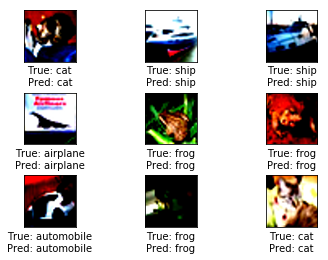

In [15]:
#Some predicted Images
# Get the first 9 images from the test-set.
images = test_x[0:9]

# Get the true classes for those images.
cls_true = test_y[0:9]
cls_true = label_to_array(cls_true)

#Get Predicted Classes
cls_pred = pred_cls[0:9]
cls_pred = cls_pred.tolist()

# Plot the images and labels using our helper-function above.
plot_images(images, cls_true, cls_pred)